### Hot Sedimentary Aquifers (HSA) are often rich in geothermal resources that are particularly suitable for direct-use. Fully understanding the effect of well layout and primary geological /human-controlled parameters in a multiple-doublet system on the fluid flow and heat transfer processes is imperative to achieve efficient heat extraction in HSA. In this study, two multiple-doublet layouts, chosen by considering the natural groundwater flow direction, reinjection-well-led (R-led) scenario and production-well-led (P-led) scenario, are proposed.

### Reference
### Tingting Ke, Shaopeng Huang, Wei Xu, Xuxiang Li,
## Study on heat extraction performance of multiple-doublet system in Hot Sedimentary Aquifers: Case study from the Xianyang geothermal field, Northwest China,Geothermics,Volume 94,2021;

In [1]:
# necessary libraries
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# for improving plot aesthetics
import seaborn as sns
sns.set_style('ticks')
sns.set_context('poster')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


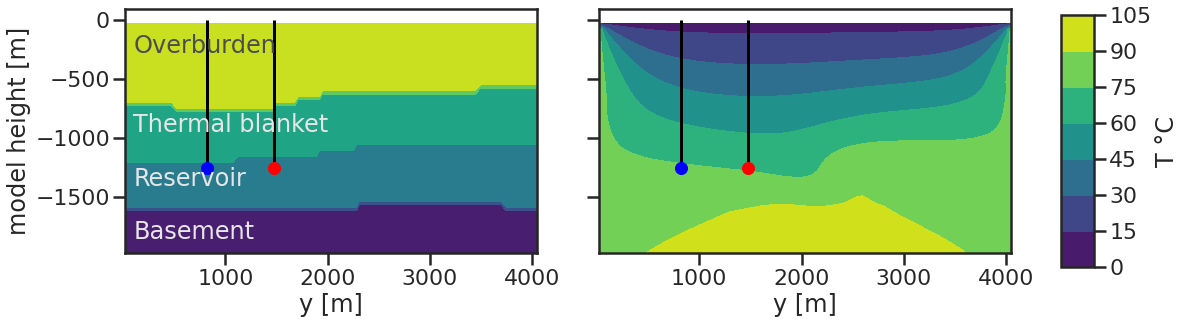

In [2]:
# 3D model file
mod = h5py.File('Input_f_final.h5')
x = mod['x'][0,0,:]
y = mod['y'][0,:,0]
z = mod['z'][:,0,0]
t = mod['temp'][:,:,:]
ui = mod['uindex'][:,:,:]
vx = mod['vx'][:,:,:]
vy = mod['vy'][:,:,:]
vz = mod['vz'][:,:,:]
mod.close()
# doublet position
prod = np.array([74, 29, 15])
inj = np.array([41, 29, 15])

# plot routine
cs = 29 # cross -section position
fig, axs = plt.subplots(1, 2, figsize=[15,5], sharey=True, sharex=True)
ax1 = axs[0].contourf(x, z-2000, ui[:,cs,:], 4, cmap= 'viridis') # geological units
ax2 = axs[1].contourf(x, z-2000, t[:,cs,:], cmap='viridis') # temperature

# plot doublet positions
axs[0].plot(prod[0]*20, (prod[2]*50-2000), 'ro')
axs[0].plot(inj[0]*20, (inj[2]*50-2000), 'bo')

axs[1].plot(prod[0]*20, (prod[2]*50-2000), 'ro')
axs[1].plot(inj[0]*20, (inj[2]*50-2000), 'bo')

axs[0].vlines(prod[0]*20, prod[2]*50-2000,0)
axs[0].vlines(inj[0]*20, inj[2]*50-2000,0)


axs[1].vlines(prod[0]*20, prod[2]*50-2000,0)
axs[1].vlines(inj[0]*20, inj[2]*50-2000,0)

#axs[1].streamplot(x, z-2000, vx[:,cs,:], vz[:,cs,:], density=[1, .5], color='white')

# axes arguments
axs[0].set_ylabel('model height [m]')
axs[0].set_xlabel('y [m]')
axs[1].set_xlabel('y [m]')

# annotations
axs[0].text(100, -1850, 'Basement', color=[.9,.9,.9])
axs[0].text(100, -1400, 'Reservoir', color=[.9,.9,.9])
axs[0].text(100, -950, 'Thermal blanket', color=[.9,.9,.9])
axs[0].text(100, -280, 'Overburden', color=[.3,.3,.3])

# colormap
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1., 0.21, 0.03, 0.7])
fig.colorbar(ax2, cax=cbar_ax, label= 'T °C')

# layout option
plt.tight_layout()
fig.savefig("doublet_example.png", dpi=400, bbox_inches='tight')

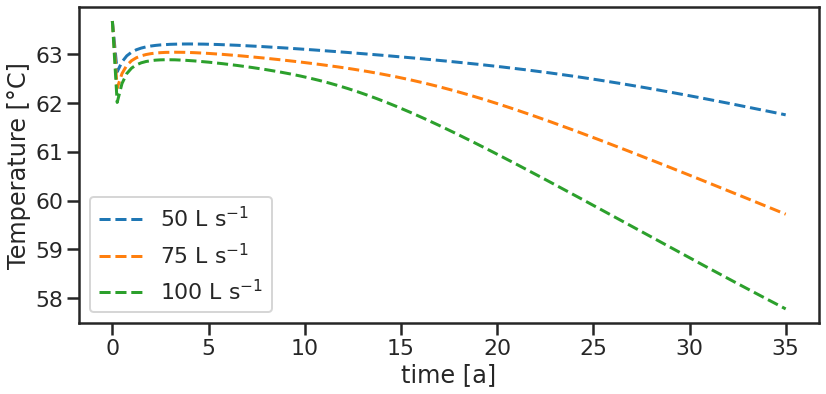

In [3]:
# load monitoring files
pr_50L = pd.read_csv('doublet_50ls.csv', comment='%')
pr_75L = pd.read_csv('doublet_75ls.csv', comment='%')
pr_100L = pd.read_csv('doublet_100ls.csv', comment='%')

fig = plt.figure(figsize=[12,6])
p50 = plt.plot(pr_50L['time'], pr_50L['temp'], '--', label='50 L s$^{-1}$')
p75 = plt.plot(pr_75L['time'], pr_75L['temp'], '--', label='75 L s$^{-1}$')
p100 = plt.plot(pr_100L['time'], pr_100L['temp'], '--', label='100 L s$^{-1}$')
plt.legend()
plt.ylabel('Temperature [°C]')
plt.xlabel('time [a]')
fig.tight_layout()

In [4]:
#Thermal Power
def therm_pow(Q, rhocp, Tin, Tpr):
    """
    A short function for calculating the thermal power
    Q - scalar, flow rate in m³/s
    rhocp - scalar, thermal capacity of water in W/(m³K)
    Tin - scaler, re-injection temperature of the water in °C
    Tpr - vector, production temperature of the water in °C
    """
    return Q*rhocp*(Tpr-Tin)

In [5]:
# parameter
Q = np.array([0.05, 0.075, 0.1]) # 50 L/s, 75 L/s, 100 L/s
rhocp = 988 * 4180 # density and specific heat capacity of water at a temperature of about 50 °C
Tin = 30 # injection temeprature in °C

# calculate thermal power
thp50 = therm_pow(Q[0], rhocp, Tin, pr_50L['temp'])
thp75 = therm_pow(Q[1], rhocp, Tin, pr_75L['temp'])
thp100 = therm_pow(Q[2], rhocp, Tin, pr_100L['temp'])

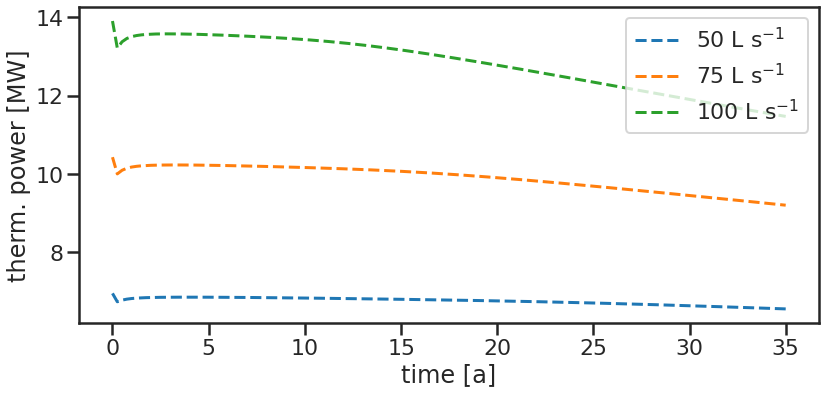

In [6]:
# plot
d2MW = 1e6 # use for calculating in MW

fig = plt.figure(figsize=[12,6])
p50 = plt.plot(pr_50L['time'], thp50/d2MW, '--', label='50 L s$^{-1}$')
p75 = plt.plot(pr_75L['time'], thp75/d2MW, '--', label='75 L s$^{-1}$')
p100 = plt.plot(pr_100L['time'], thp100/d2MW, '--', label='100 L s$^{-1}$')
plt.legend()
plt.ylabel('therm. power [MW]')
plt.xlabel('time [a]')
fig.tight_layout()